In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import networkx as nx
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import networkx as nx
import numpy as np

In [35]:
dic     = {}

for N in range(3,11):

    df          = pd.read_csv(f"net_currents_Nx={N}_Ny={N}_Nz=1_Ne=8.csv")
    df1         = df.copy()
    dic[N]      = df1

dic[3]

,"(0, 8)","(1, 9)","(2, 10)","(3, 11)","(4, 14)","(5, 13)","(6, 15)","(7, 16)","(8, 0)","(8, 9)",...,"(14, 4)","(14, 11)","(14, 15)","(15, 6)","(15, 12)","(15, 14)","(15, 16)","(16, 7)","(16, 13)","(16, 15)"
0,10.0,0.0,7.0,6.0,0.0,5.0,3.0,0.0,0.0,11.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,0.0,0.0
1,18.0,0.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,20.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,11.0,0.0,6.0,7.0,1.0,0.0,3.0,0.0,0.0,14.0,...,1.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,1.0,0.0
3,14.0,0.0,6.0,7.0,0.0,3.0,0.0,0.0,0.0,16.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


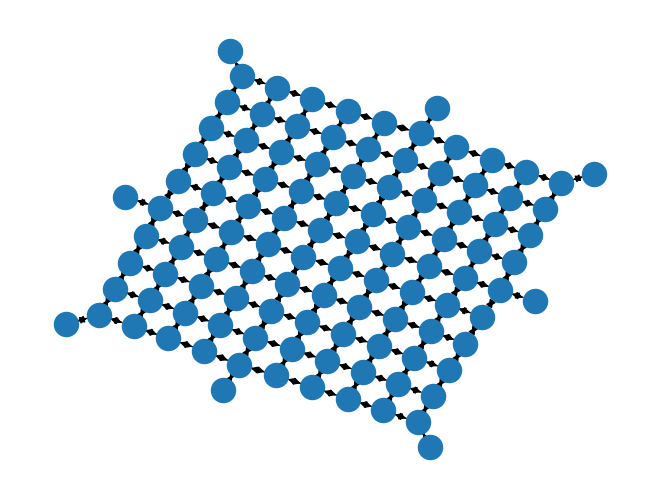

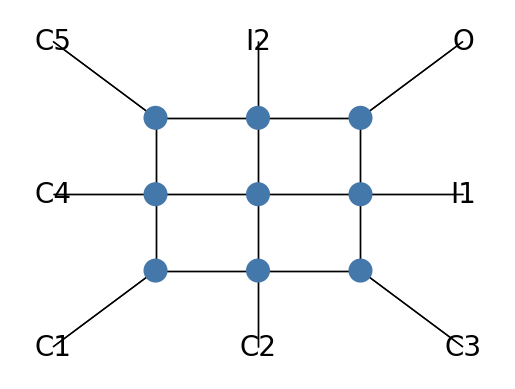

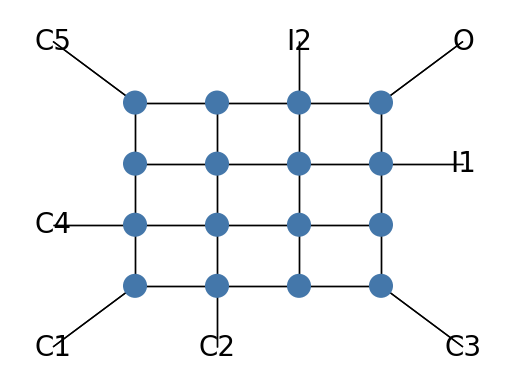

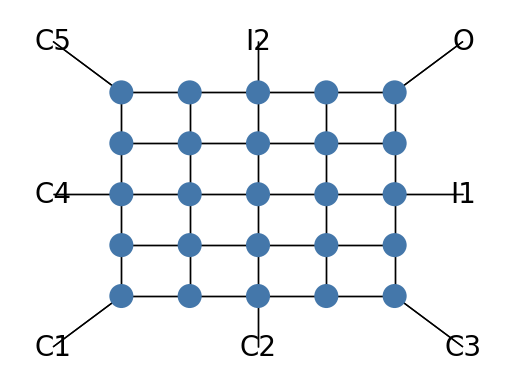

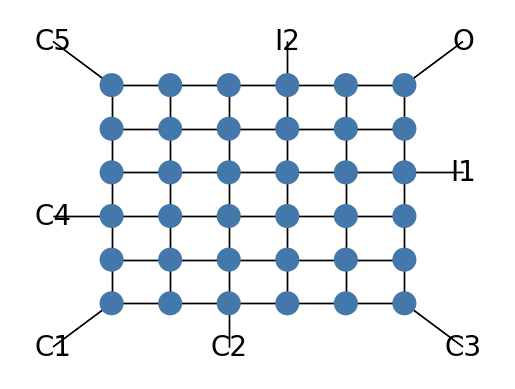

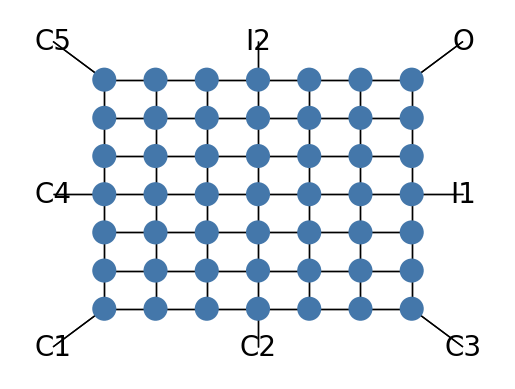

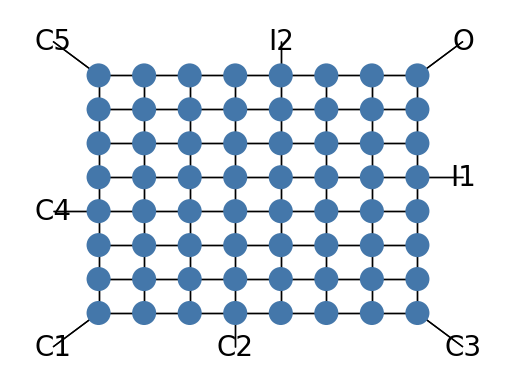

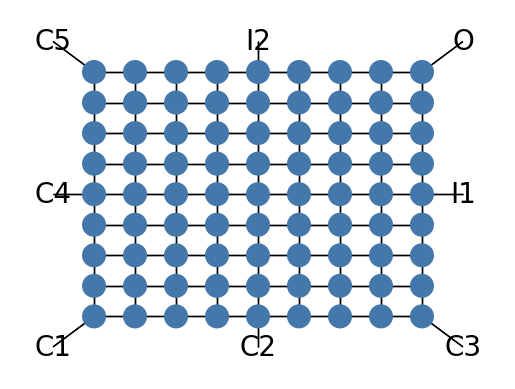

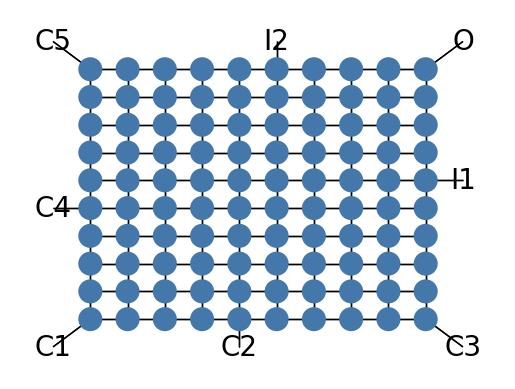

In [60]:
for N in range(3,11):
    edges   = list(dic[N].columns)
    edges   = [eval(i) for i in edges]
    G       = nx.DiGraph()

    for i in range(N*N+8):
        G.add_node(i)
    for j in edges:
        G.add_edge(j[0],j[1])

    pos = {}
    Nx  = N
    Ny  = N
    x   = 0
    y   = 0
    ind = 0

    while (ind < (Nx*Ny)):

        pos[ind+8]  = (x, y)
        x           += 1

        if ((x % Nx) == 0):

            y += 1
            x = 0
        
        if (y == Ny):
            break

        ind += 1

    pos[0] = (-1,-1)
    pos[1] = (int((N-1)/2),-1)
    pos[2] = (N,-1)
    pos[3] = (-1,int((N-1)/2))
    pos[4] = (-1,N)
    pos[5] = (N,int((N)/2))
    pos[6] = (int((N)/2),N)
    pos[7] = (N,N)

    # nx.draw_networkx(G)
    colors              = np.repeat('#4477AA', len(list(G)))
    edgecolors          = np.repeat('none', len(list(G)))
    colors[:8]          = 'none'
    labels              = {i:'' for i in range(len(list(G)))}
    labels[0]           = 'C1'
    labels[1]           = 'C2'
    labels[2]           = 'C3'
    labels[3]           = 'C4'
    labels[4]           = 'C5'
    labels[5]           = 'I1'
    labels[6]           = 'I2'
    labels[7]           = 'O'
    # labels[:8]          = ['C1','C2','C3','C4','C5','I1','I2','O']
    fig = plt.figure()
    ax  = fig.add_subplot()
    ax  = nx.draw(G, pos=pos, ax=ax, node_color=colors, arrows=False, edgecolors=edgecolors)
    nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=20, ax=ax)
    fig.savefig(f"{N}{N}.svg", transparent=True, bbox_inches='tight')